In [5]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_classifier(classifier, X, y):
    # Define the minimum and maximum values for X and Y
    # that will be used in the mesh grid
    min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    # Define the step size to use in plotting the mesh grid 
    mesh_step_size = 0.01

    # Define the mesh grid of X and Y values
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))

    # Run the classifier on the mesh grid
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])

    # Reshape the output array
    output = output.reshape(x_vals.shape)

    # Create a plot
    plt.figure()

    # Choose a color scheme for the plot 
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)

    # Overlay the training points on the plot 
    plt.scatter(X[:, 0], X[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)

    # Specify the boundaries of the plot
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())

    # Specify the ticks on the X and Y axes
    plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))

    plt.show()

### 🌲 의사 결정 트리 ( Decision Tree )
데이터 세트를 별개의 분기로 분할하는 방법 → 파티션을 통해 간단한 결정  ( 단일 모델 사용 )

의사 결정 프로세스는 트리 맨 위에 있는 루트 노드에서 시작 

각 노드 = 결정 규칙, 대상 레이블과 입력 데이터 간의 관계를 기반으로 구성됨

정보 `엔트로피( entropy )` → 불확실성의 척도 ! 트리 아래로 내려갈수록 줄어들어야 함 

루트 노드 → 리프 노드 이동 시 불확실성을 줄이는 것이 목표

/var/folders/yw/d4_b14c96kx6qyjbv_wvzdhw0000gn/T/ipykernel_12296/3947895542.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')


Text(0.5, 1.0, 'Input Data')

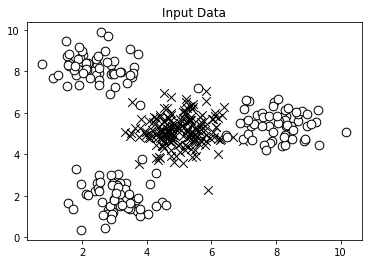

In [10]:
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 입력 데이터 로드, 각 값은 쉼표로 구분 ... 마지막 값은 대상 레이블
input_file ='data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

# 입력 데이터를 레이블에 따라 두 클래스로 분리
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

# 입력 데이터를 산점도( scatter plot )로 시각화
plt.figure()
plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='black', edgecolors='black', linewidth=1, marker='x')
plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
plt.title('Input Data')

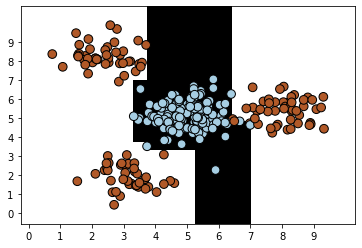

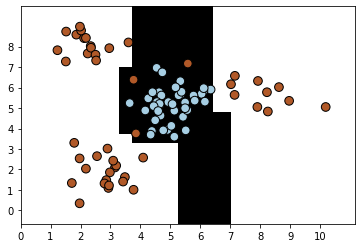

########################################
Classifier performance on training dataset
              precision    recall  f1-score   support

     Class-0       0.99      1.00      1.00       137
     Class-1       1.00      0.99      1.00       133

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270


########################################
Classifier performance on test dataset
              precision    recall  f1-score   support

     Class-0       0.93      1.00      0.97        43
     Class-1       1.00      0.94      0.97        47

    accuracy                           0.97        90
   macro avg       0.97      0.97      0.97        90
weighted avg       0.97      0.97      0.97        90



In [13]:
# 데이터를 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

# 의사 결정 트리 분류기 생성 및 학습
# random_state -> 의사 결정 트리 분류 알고리즘의 초기화에 필요한 난수 생성기에서 사용하는 seed 참조
# max_depth -> 구성하려는 트리의 최대 깊이
params = {'random_state': 0, 'max_depth': 4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train, y_train)
visualize_classifier(classifier, X_train, y_train)

# 예측( 출력 ) 계산 및 시각화
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier, X_test, y_test)

# 분류기 성능 평가 ( 정밀도, 재현율, F1 Score )
class_names = ['Class-0', 'Class-1']
print('#'*40)
print("Classifier performance on training dataset")
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
print()

print('#'*40)
print("Classifier performance on test dataset")
print(classification_report(y_test, y_test_pred , target_names=class_names))

plt.show()

## 😣 랜덤 포레스트와 익스트림 랜덤 포레스트

### 개념

`랜덤 포레스트( random forest )` : 의사 결정 트리를 사용해 개별 모델을 구성하는 앙상블 학습

- **훈련 데이터의 무작위 하위 집합**으로 각 의사 결정 트리를 구성 → 트리 간의 다양성 보장
- 과적합 X 장점
- 트리를 구성하는 동안 노드 연속적 분할, **각 레벨에서 최선의 선택**
- 분할 시 입력 데이터 세트의 모든 특성 고려하는 대신 특성의 무작위 하위 집합에서 최선의 분할 선택 → 무작위성으로 **편향 증가**, **분산 감소** → 강력한 모델

`익스트림 랜덤 포레스트( extremely random forest )` : 특성 하위 집합뿐만 아니라 **임계값도 무작위 선택** → 모델의 분산 더욱 감소 → 비교적 완만한 결정 경계

In [15]:
import argparse

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# 인수 parser -> 분류기 유형을 매개변수로 사용
def build_arg_parser():
	parser = argparse.ArgumentParser(description='Classify data using Ensemble')
	parser.add_argument('--classifier-type', dest='classifier_type', 
		required=True, choices=['rf', 'erf'], help='Type of classifier to use; can be either "rf" or "erf"')
	return parser

In [16]:
# main 함수 내에서 입력 인수 파싱 
if __name__ == '__main__':
	args = build_arg_parser().parse_args()
	classifier_type = args.classifier_type

	# 입력 데이터 로드
	input_file = 'data_random_forests.txt'
	data = np.loadtxt(input_file, delimiter=',')
	X, y = data[:, :-1], data[:, -1]

	# 입력 데이터를 레이블에 따라 세 클래스로 분류 
	class_0 = np.array(X[y==0])
	class_1 = np.array(X[y==1])
	class_1 = np.array(X[y==2])
	
	# 입력 데이터 시각화
	plt.figure()
	plt.scatter(class_0[:, 0], class_0[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='s')
	plt.scatter(class_1[:, 0], class_1[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='o')
	plt.scatter(class_2[:, 0], class_2[:, 1], s=75, facecolors='white', edgecolors='black', linewidth=1, marker='^')
	plt.title('Input Data')

usage: ipykernel_launcher.py [-h] --classifier-type {rf,erf}
ipykernel_launcher.py: error: the following arguments are required: --classifier-type


SystemExit: 2

/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [17]:
	# 훈련 세트와 테스트 세트로 분할
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
	
	# 앙상블 학습 분류기 생성
	# n_estimators : 구성할 트리 수 
	params = {'n_estimators': 100, 'max_depth':4, 'random_state':4, 'random_state': 0}
	
	if classifier_type == 'rf' :
		classifier = RandomForestClassifier(**params)
	else :
		classifier = ExtraTreesClassifier(**params)
	
	# 분류기 학습 및 시각화
	classifier.fit(X_train, y_train)
	visualize_classifier(classifier, X_train, y_train, 'Training dataset')
	
	# 테스트 데이터에 대한 출력 계산, 시각화
	y_test_pred = classifier.predict(X_test)
	visualize_classifier(classifier, X_test, y_test, 'Test dataset')
	
	# 분류기 성능 평가
	class_names = ['Class-0', 'Class-1', 'Class-2']
	print("#"*40)
	print("Classifier performance on training dataset")
	print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
	print()
	
	print("#"*40)
	print("Classifier performance on training dataset")
	print(classification_report(y_test, y_test_pred, target_names=class_names))

NameError: name 'classifier_type' is not defined

### 클래스 불균형 다루기

In [18]:
import sys

params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0}
if len(sys.argv) > 1:
	if sys.argv[1] == 'balance':
		params = {'n_estimators': 100, 'max_depth': 4, 'random_state': 0, 'class_weight': 'balanced'}
	
	else:
		raise TypeError("Invalid input argument; should be 'balance'")

TypeError: Invalid input argument; should be 'balance'

### 최적의 매개변수 찾기
가장 적합한 매개변수 → 가능한 조합 모두 확인은 효율적 X … Grid Search 이용 ! 

In [19]:
from sklearn import grid_search

# 매개변수 그리드 정의
parameter_grid = [{'n_estimators': [100], 'max_depth': [2, 4, 7, 12, 16]}, 
										{'max_depth': [4], 'n_esitmators': [25, 50, 100, 250]}
									]

# 최적의 매개변수 조합을 찾도록 하는 지표 정의
metrics = ['precision_weighted', 'recall_weight']

# 각 지표에 대해 그리드 검색 실행
for metric in metrics :
	print("Searching optimal parameters for", metric)
	
	classifier = grid_search.GridSearchCV(
		ExtraTreesClassifier(random_state=0), 
		parameter_grid, cv=5, scoring=metric)

	classifier.fit(X_train, y_train)

	# 각 매개변수 조합의 점수 출력
	print("Grid scores for the parameter grid")
	for params, avg_score, _ in classifier.grid_scores_ :
		print(params, '-->', round(avg_score, 3))

	print("Best parameters:", classifier.best_params_)
	
	y_pred = classifier.predict(X_test)
	print("Performance report")
	print(classificatin_report(y_test, y_pred))

ImportError: cannot import name 'grid_search' from 'sklearn' (/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/__init__.py)

### 상대적인 특성 중요도 계산
특성 중요도에 따라 중복, 복잡성을 줄이면 알고리즘 속도는 높아짐 ! 

`에이다부스트( AdaBoost ) 회귀자` → Adaptive Boosting ; 특성 중요도 계산

현재 분류기 훈련을 위한 데이터 분포에서 훈련 데이터 포인트 추출 

→ 반복적으로 업데이트, 후속 분류기는 더 **어려운 데이터 포인트( 잘못 분류된 )에 집중** 

→ 계단식으로 분류, **가중 다수 투표**를 통해 상대적인 특성 중요도 결정

In [21]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import AdaBoostRegressor
from sklearn import datasets
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle

# 주택 데이터 로드
housing_data =datasets.load_boston()

# 데이터 섞기
X, y = shuffle(housing_data.data, housing_data.target, random_state=7)

# 테스트, 훈련 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

/Users/isdiscodead/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California

In [23]:
# AdaBoost 회귀자 모델
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=400, random_state=7)
regressor.fit(X_train, y_train)

# AdaBoost 회귀자 성능 추정
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("ADABOOST REGRESSOR")
print("Mean squared error =", round(mse, 2))
print("Explained variance score =", round(evs, 2))

# 특성 중요도 추출
feature_importances = regressor.feature_importances_
feature_names = housing_data.feature_names_

# 중요도 값 정규화
feature_importances = 100.0 * (feature_importances / max(feature_importances))

# 값 정렬 / 뒤집기
index_sorted = np.flipud(np.argsort(feature_importances))'

# X축 눈금 정렬
pos = np.arrange(index_sorted.shape[0]) + 0.5

# 막대 그래프 생성
plt.figure()
plt.bar(pos, feature_importances[index_sorted], align='center')
plt.xticks(pos,feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title('Feature importance using AdaBoost regressor')
plt.show()

SyntaxError: EOL while scanning string literal (1285765801.py, line 21)

🖼️ 익스트림 랜덤 포레스트 회귀자로 트래픽 예측하기